<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.7.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

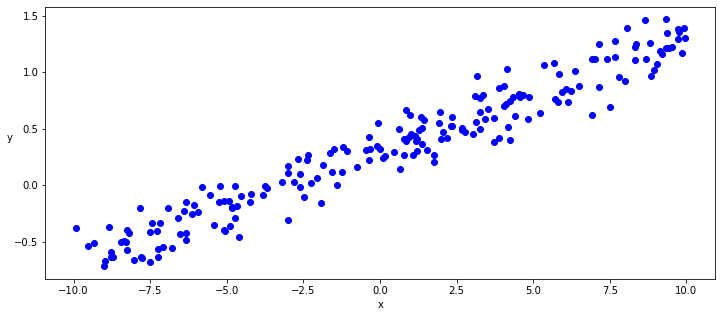

In [6]:
x, y = generate_data()

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
plt.xlabel("x")
plt.ylabel("y",rotation = 0)

# TensorFlow Dynamic Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))

    def __call__(self,x): 
        return x * self.w + self.b


# PyTorch Dynamic Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1).uniform_(-0.1, 0.1))
        self.b = torch.nn.Parameter(torch.Tensor(1).uniform_(-0.1, 0.1))
  
    def forward(self, x):  
        return x @ self.w + self.b


# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
@tf.function
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return tf.math.reduce_sum(diff * diff) / tf.size(diff, out_type=tf.dtypes.float32)

tf_model = LinearRegressionKeras()
[w, b] = tf_model.trainable_variables

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

    w.assign(w - w_grad * learning_rate)
    b.assign(b - b_grad * learning_rate)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} : Loss {loss.numpy()}")

Epoch 0 : Loss 0.509335458278656
Epoch 20 : Loss 0.09806949645280838
Epoch 40 : Loss 0.06540217250585556
Epoch 60 : Loss 0.060064658522605896
Epoch 80 : Loss 0.05691194534301758
Epoch 100 : Loss 0.054127827286720276
Epoch 120 : Loss 0.05156611278653145
Epoch 140 : Loss 0.049201320856809616
Epoch 160 : Loss 0.047017768025398254
Epoch 180 : Loss 0.04500152915716171
Epoch 200 : Loss 0.04313976690173149
Epoch 220 : Loss 0.04142066463828087
Epoch 240 : Loss 0.03983328491449356
Epoch 260 : Loss 0.038367513567209244
Epoch 280 : Loss 0.03701407089829445
Epoch 300 : Loss 0.035764314234256744
Epoch 320 : Loss 0.034610308706760406
Epoch 340 : Loss 0.033544737845659256
Epoch 360 : Loss 0.0325608104467392
Epoch 380 : Loss 0.03165226802229881
Epoch 400 : Loss 0.03081332892179489
Epoch 420 : Loss 0.030038680881261826
Epoch 440 : Loss 0.029323382303118706
Epoch 460 : Loss 0.028662895783782005
Epoch 480 : Loss 0.028053011745214462


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    return torch.mean(torch.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

for epoch in range(epochs):
    y_pred = torch_model(inputs)
    loss = squared_error(y_pred, labels)

    loss.backward()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")


Epoch 0 : Loss 0.1622672826051712
Epoch 20 : Loss 0.0683315321803093
Epoch 40 : Loss 0.05873892456293106
Epoch 60 : Loss 0.05539948493242264
Epoch 80 : Loss 0.052710629999637604
Epoch 100 : Loss 0.05025601387023926
Epoch 120 : Loss 0.047991495579481125
Epoch 140 : Loss 0.04590063542127609
Epoch 160 : Loss 0.04396999254822731
Epoch 180 : Loss 0.04218726605176926
Epoch 200 : Loss 0.040541134774684906
Epoch 220 : Loss 0.03902113810181618
Epoch 240 : Loss 0.03761759772896767
Epoch 260 : Loss 0.03632160276174545
Epoch 280 : Loss 0.03512491285800934
Epoch 300 : Loss 0.03401990607380867
Epoch 320 : Loss 0.032999563962221146
Epoch 340 : Loss 0.03205740824341774
Epoch 360 : Loss 0.031187433749437332
Epoch 380 : Loss 0.030384115874767303
Epoch 400 : Loss 0.02964235283434391
Epoch 420 : Loss 0.028957419097423553
Epoch 440 : Loss 0.028324969112873077
Epoch 460 : Loss 0.027740979567170143
Epoch 480 : Loss 0.027201728895306587


# Data Visualization

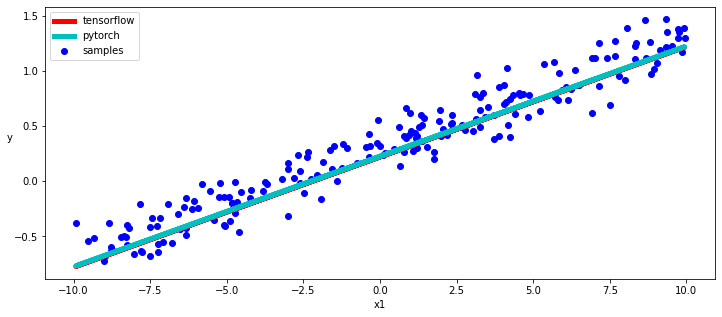

In [13]:
[w_tf, b_tf] = tf_model.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)

# TensorFlow Model with Linear layer

In [14]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.linear = tf.keras.layers.Dense(1, activation=None) # , input_shape=[1]

    def call(self, x): 
        return self.linear(x)

# PyTorch Model with Linear layer


In [15]:
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

# TensorFlow Fit with real Loss function and Optimizer

In [16]:
tf_model_fit = LinearRegressionKeras()
tf_model_fit.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss='mean_absolute_error')
# tf_model_fit.build(input_shape=(None, 1))
# tf_model_fit.summary()
tf_model_fit.fit(x, y, epochs=epochs, batch_size=x.shape[0], verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3035
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3009
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3000
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 13/500
1/1 [==============================] - 0s 2ms/st

# TensorFlow Training with real Loss function and Optimizer

In [17]:
tf_model_train_loop = LinearRegressionKeras()

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

for epoch in range(epochs * 3):
    x_batch = tf.reshape(x, [200, 1])
    with tf.GradientTape() as tape:
        y_pred = tf_model_train_loop(x_batch)
        y_pred = tf.reshape(y_pred, [200])
        loss = tf.losses.mse(y_pred, y)
    
    grads = tape.gradient(loss, tf_model_train_loop.variables)
    
    optimizer.apply_gradients(grads_and_vars=zip(grads, tf_model_train_loop.variables))

    if epoch % 20 == 0:
        print(f"Epoch {epoch} : Loss {loss.numpy()}")


Epoch 0 : Loss 80.43944549560547
Epoch 20 : Loss 5.861504077911377
Epoch 40 : Loss 0.5202236771583557
Epoch 60 : Loss 0.13190408051013947
Epoch 80 : Loss 0.0983453020453453
Epoch 100 : Loss 0.09060533344745636
Epoch 120 : Loss 0.08512129634618759
Epoch 140 : Loss 0.08017639070749283
Epoch 160 : Loss 0.07561887055635452
Epoch 180 : Loss 0.07141116261482239
Epoch 200 : Loss 0.06752588599920273
Epoch 220 : Loss 0.06393830478191376
Epoch 240 : Loss 0.06062560901045799
Epoch 260 : Loss 0.05756672844290733
Epoch 280 : Loss 0.05474222078919411
Epoch 300 : Loss 0.05213412642478943
Epoch 320 : Loss 0.04972587153315544
Epoch 340 : Loss 0.047502126544713974
Epoch 360 : Loss 0.04544876888394356
Epoch 380 : Loss 0.043552741408348083
Epoch 400 : Loss 0.04180198535323143
Epoch 420 : Loss 0.04018539562821388
Epoch 440 : Loss 0.0386926494538784
Epoch 460 : Loss 0.0373142808675766
Epoch 480 : Loss 0.03604152053594589
Epoch 500 : Loss 0.03486628457903862
Epoch 520 : Loss 0.03378109633922577
Epoch 540 : L

# PyTorch Training with real Loss function and Optimizer

In [18]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))

In [19]:
torch_model = LinearRegressionPyTorch()

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs * 3):
    y_pred = torch_model(inputs)
    loss = criterion(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")

Epoch 0 : Loss 0.8326272368431091
Epoch 20 : Loss 0.08015058189630508
Epoch 40 : Loss 0.026221513748168945
Epoch 60 : Loss 0.022267000749707222
Epoch 80 : Loss 0.021894555538892746
Epoch 100 : Loss 0.0217851921916008
Epoch 120 : Loss 0.021700987592339516
Epoch 140 : Loss 0.021624434739351273
Epoch 160 : Loss 0.02155383862555027
Epoch 180 : Loss 0.021488649770617485
Epoch 200 : Loss 0.021428456529974937
Epoch 220 : Loss 0.021372877061367035
Epoch 240 : Loss 0.021321551874279976
Epoch 260 : Loss 0.02127416431903839
Epoch 280 : Loss 0.021230407059192657
Epoch 300 : Loss 0.021190010011196136
Epoch 320 : Loss 0.021152697503566742
Epoch 340 : Loss 0.021118247881531715
Epoch 360 : Loss 0.0210864394903183
Epoch 380 : Loss 0.021057063713669777
Epoch 400 : Loss 0.021029939875006676
Epoch 420 : Loss 0.021004898473620415
Epoch 440 : Loss 0.020981770008802414
Epoch 460 : Loss 0.02096041664481163
Epoch 480 : Loss 0.02094070240855217
Epoch 500 : Loss 0.02092249132692814
Epoch 520 : Loss 0.02090567909

# Data Visualization

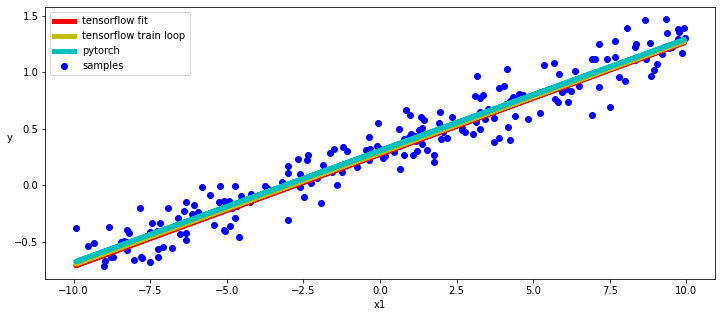

In [20]:
[w_tf, b_tf] = tf_model_fit.trainable_variables
[w2_tf, b2_tf] = tf_model_train_loop.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

w_tf = tf.reshape(w_tf, [1])
w2_tf = tf.reshape(w2_tf, [1])

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow fit")
  ax.plot(x, w2_tf * x + b2_tf, "y", linewidth = 5.0, label = "tensorflow train loop")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)